# TP2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Data Gen

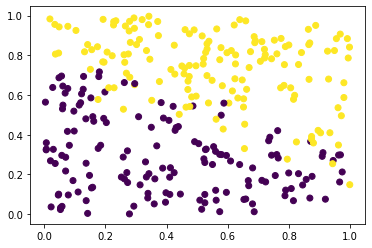

(3, 300)
[[0.04560928 0.96566417 0.6807085  0.33897292 0.86467285 0.03623539
  0.19808108 0.5820327  0.03553384 0.57834675 0.36763697 0.26494982
  0.25855082 0.39770656 0.68810129 0.23393084 0.67417001 0.09372724
  0.66149141 0.05308584 0.94869706 0.72033791 0.68626863 0.22186125
  0.52748623 0.90858564 0.46987491 0.60338269 0.22803334 0.93383139
  0.17993592 0.84083782 0.22629607 0.68610381 0.48976843 0.10340975
  0.99789016 0.92610596 0.33823248 0.30144951 0.60900687 0.41040963
  0.39620877 0.87551702 0.04782349 0.76059051 0.27734844 0.17813829
  0.61497288 0.96044071 0.12707561 0.66969157 0.52172175 0.37630784
  0.02930707 0.30824173 0.94457811 0.19415493 0.9988215  0.3336363
  0.04672627 0.03433035 0.8447163  0.83121024 0.7741783  0.42670186
  0.29501005 0.5871684  0.59547774 0.0526786  0.06801177 0.42484475
  0.61145439 0.81856093 0.42445149 0.58479594 0.74294059 0.57333216
  0.05786039 0.34510545 0.78910413 0.63282254 0.27233313 0.50850163
  0.86340073 0.62319777 0.87099599 0.524

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def datagen(n,sig):
    X = np.random.rand(2,n)
    y = np.where(-.5* X[0] + .75 > X[1], -1, 1)
    d = abs((.5 * X[0] + X[1] -.75)) / (math.sqrt(.5 * .5 + 1 * 1))
    r = np.exp(-(d*d)/(2*sig*sig))
    z = np.random.binomial(n=1, p=r/2)
    y[z==1] = -y[z==1]
    y = np.where(y==-1, 0, 1)
    return X, y

X, y = datagen(300, 0.05)
plt.scatter(X[0], X[1], c=y)
plt.show()

X_plus = np.vstack((X, np.ones((1,300))))
print(X_plus.shape)
print(X_plus)

# 2. Batch Gradient Descent

(27012, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.34124381e-01  6.87039901e-01  2.00000000e-02]
 [ 1.05476177e-01  9.24918485e-01 -6.69221276e-01]
 ...
 [ 1.06798571e+01  2.13876520e+01 -1.62656541e+01]
 [ 1.06798571e+01  2.13876520e+01 -1.62656541e+01]
 [ 1.06798571e+01  2.13876520e+01 -1.62656541e+01]]


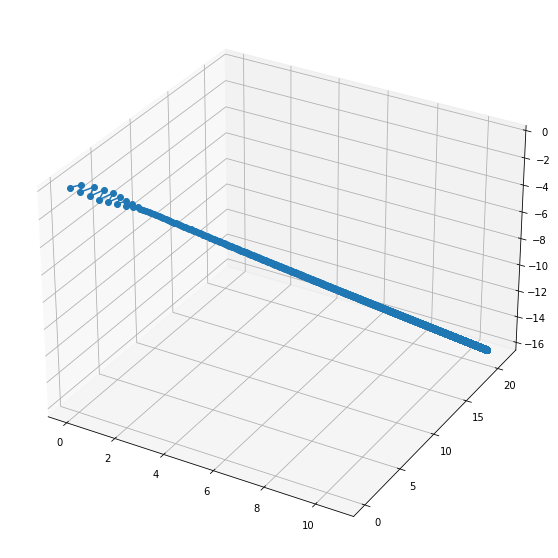

In [3]:
theta = np.array([0, 0, 0])
thetas_gd_02 = np.array([theta])
learning_rate = 0.02

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    g = X_plus@err
    theta = theta - learning_rate*g
    thetas_gd_02 = np.vstack((thetas_gd_02, theta))
    if np.array_equal(thetas_gd_02[len(thetas_gd_02) - 2], theta):
        break
    
print(thetas_gd_02.shape)
print(thetas_gd_02)

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.gca(projection='3d')
ax1.plot(thetas_gd_02[:,0], thetas_gd_02[:,1], thetas_gd_02[:,2], '-o')
plt.show()

# Fix Threshold max
threshold = len(thetas_gd_02)

threshold: 27012
threshold exceeded !
(27014, 3)
[[  0.           0.           0.        ]
 [  1.1706219    3.4351995    0.1       ]
 [ -3.41174471   0.11351136 -11.33788284]
 ...
 [ 12.0064124   23.73371914 -17.29353805]
 [ 11.44516086  23.18951433 -18.37394   ]
 [ 12.0064124   23.73371914 -17.29353805]]


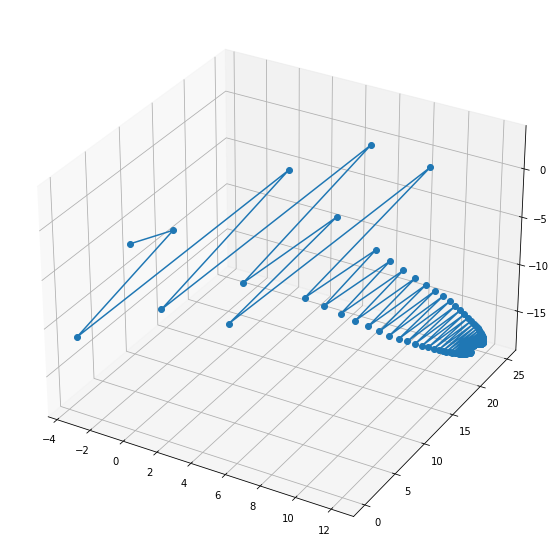

In [4]:
theta = np.array([0, 0, 0])
thetas_gd_1 = np.array([theta])
learning_rate = 0.1

cpt = 0
print("threshold: " + str(threshold))

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    g = X_plus@err
    theta = theta - learning_rate*g
    thetas_gd_1 = np.vstack((thetas_gd_1, theta))
    cpt += 1
    if np.array_equal(thetas_gd_1[len(thetas_gd_1) - 2], theta):
        break
    if cpt > threshold:
        print("threshold exceeded !")
        break
    
print(thetas_gd_1.shape)
print(thetas_gd_1)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas_gd_1[:,0], thetas_gd_1[:,1], thetas_gd_1[:,2], '-o')
plt.show()

**=> On converge (pas toujours) plus vite !!**

# 3. Newton Method

(3511, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.91406752e-02  5.34039940e-02 -3.66184737e-02]
 [ 3.80937309e-02  1.06280679e-01 -7.28761620e-02]
 ...
 [ 1.06798571e+01  2.13876520e+01 -1.62656541e+01]
 [ 1.06798571e+01  2.13876520e+01 -1.62656541e+01]
 [ 1.06798571e+01  2.13876520e+01 -1.62656541e+01]]


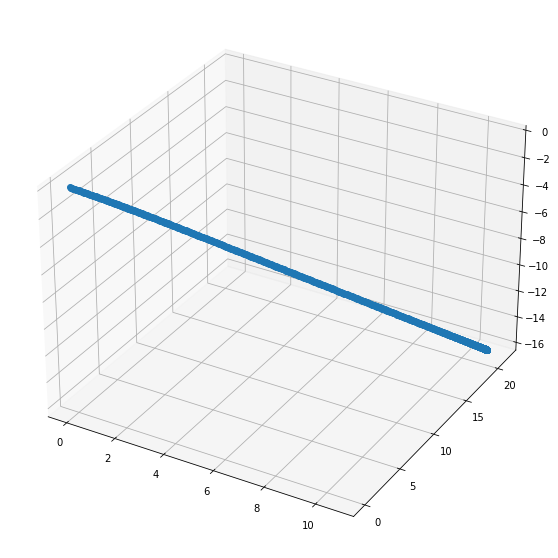

In [5]:
theta = np.array([0, 0, 0])
thetas_nwn_01 = np.array([theta])
learning_rate = 0.01

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    s = np.multiply(pred, (1-pred))
    S = np.diag(s.flatten())

    H = X_plus@S@X_plus.T
    g = X_plus@err
    theta = theta - learning_rate*np.linalg.inv(H)@g
    thetas_nwn_01 = np.vstack((thetas_nwn_01, theta))
    if np.array_equal(thetas_nwn_01[len(thetas_nwn_01) - 2], theta):
        break
    
print(thetas_nwn_01.shape)
print(thetas_nwn_01)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas_nwn_01[:,0], thetas_nwn_01[:,1], thetas_nwn_01[:,2], '-o')
plt.show()

(359, 3)
[[  0.           0.           0.        ]
 [  0.19140675   0.53403994  -0.36618474]
 [  0.36723796   1.02101638  -0.70083525]
 ...
 [ 10.67985714  21.38765196 -16.26565413]
 [ 10.67985714  21.38765196 -16.26565413]
 [ 10.67985714  21.38765196 -16.26565413]]


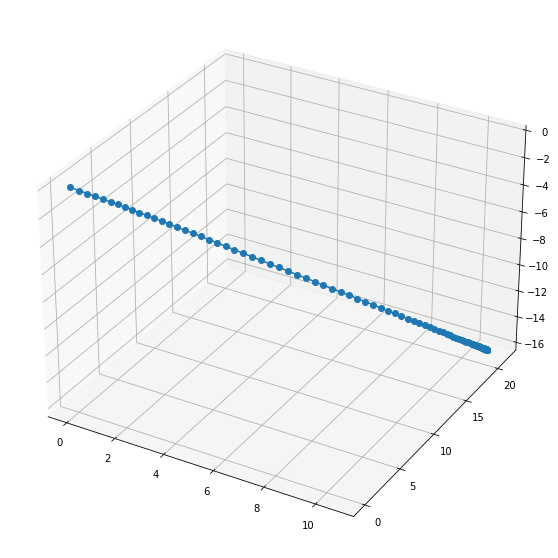

In [6]:
theta = np.array([0, 0, 0])
thetas_nwn_1 = np.array([theta])
learning_rate = 0.1

while True:
    pred = sigmoid(X_plus.T@theta)
    err = pred - y
    s = np.multiply(pred, (1-pred))
    S = np.diag(s.flatten())

    H = X_plus@S@X_plus.T
    g = X_plus@err
    theta = theta - learning_rate*np.linalg.inv(H)@g
    thetas_nwn_1 = np.vstack((thetas_nwn_1, theta))
    if np.array_equal(thetas_nwn_1[len(thetas_nwn_1) - 2], theta):
        break
    
print(thetas_nwn_1.shape)
print(thetas_nwn_1)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas_nwn_1[:,0], thetas_nwn_1[:,1], thetas_nwn_1[:,2], '-o')
plt.show()

# 4. SGD

threshold: 56410
threshold exceeded !
(56412, 3)
[[ 17.29563395  33.45652828 -25.52111024]
 [ 18.27948935  33.83266082 -24.40223161]
 [ 19.46502589  33.77097169 -23.82113591]
 [ 18.38828029  33.36968435 -25.05425678]
 [ 18.23533554  33.9382427  -24.32820668]
 [ 18.63590958  33.78141702 -24.09059482]
 [ 18.13960853  33.59170318 -24.69262199]
 [ 18.56239739  33.49478802 -24.59665786]
 [ 18.2022803   33.51559847 -24.71402792]
 [ 17.89198241  33.69807266 -24.52617177]
 [ 18.8573478   32.76241354 -25.08883592]
 [ 17.29780293  32.67506161 -26.14925125]
 [ 18.42109743  33.81082758 -23.75792856]
 [ 17.67113675  33.34714883 -24.81226944]
 [ 17.49241915  33.32180568 -24.71347369]
 [ 17.28675579  34.01232167 -23.87025   ]
 [ 17.70677815  33.78170432 -23.81198561]
 [ 18.56982643  33.41763647 -23.48388184]
 [ 17.52644558  32.2592387  -25.80834247]
 [ 18.0674132   32.95954331 -24.55823192]]


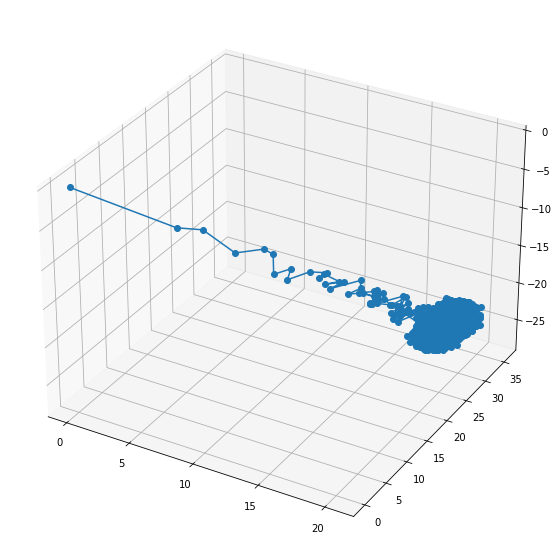

In [7]:
theta = np.array([0, 0, 0])
thetas_sgd_1_5 = np.array([theta])
learning_rate = 1.5

cpt = 0
print("threshold: " + str(threshold))

tmp_y = y.copy()
tmp_X_plus = X_plus.copy()

while True:
    sigma = np.random.permutation(300)
    tmp_X_plus = np.vstack((tmp_X_plus[0][sigma], tmp_X_plus[1][sigma], tmp_X_plus[2][sigma]))
    tmp_y = tmp_y[sigma]
    cpt += 1
    for i in range(300):
        pred = sigmoid(tmp_X_plus[:,i].T@theta)
        err = pred - tmp_y[i]
        g = tmp_X_plus[:,i]*err
        theta = theta - learning_rate*g
    thetas_sgd_1_5 = np.vstack((thetas_sgd_1_5, theta))
    if np.array_equal(thetas_sgd_1_5[len(thetas_sgd_1_5) - 2], theta):
        break
    if cpt > threshold:
        print("threshold exceeded !")
        break

        
print(thetas_sgd_1_5.shape)
if cpt > threshold:
    print(thetas_sgd_1_5[-20:])
else:
    print(thetas_sgd_1_5)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas_sgd_1_5[:,0], thetas_sgd_1_5[:,1], thetas_sgd_1_5[:,2], '-o')
plt.show()

threshold: 56410


<ipython-input-2-63e439474592>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


threshold exceeded !
thetas :
(56412, 3)
[[  963.6737074   3263.41963116 -1915.54037542]
 [  963.68316504  3263.44048134 -1915.55410293]
 [  963.6879899   3263.46260101 -1915.56783057]
 [  963.69719039  3263.48720066 -1915.58155767]
 [  963.70153661  3263.50880642 -1915.59528416]
 [  963.71277     3263.53124247 -1915.60901117]
 [  963.7186126   3263.55580854 -1915.62273761]
 [  963.72442238  3263.58086159 -1915.63646433]
 [  963.72915247  3263.60471218 -1915.65019047]
 [  963.73913577  3263.62537452 -1915.66391672]
 [  963.74626655  3263.6469246  -1915.67764287]
 [  963.75549472  3263.67093507 -1915.69136898]
 [  963.76425218  3263.69752332 -1915.70509491]
 [  963.77045241  3263.71908243 -1915.71882053]
 [  963.77708251  3263.74520248 -1915.73254621]
 [  963.78611913  3263.77030678 -1915.74627172]
 [  963.79648361  3263.79836325 -1915.75999733]
 [  963.80186897  3263.82421305 -1915.7737232 ]
 [  963.80717833  3263.85078837 -1915.78744873]
 [  963.8165262   3263.86947372 -1915.80117473]

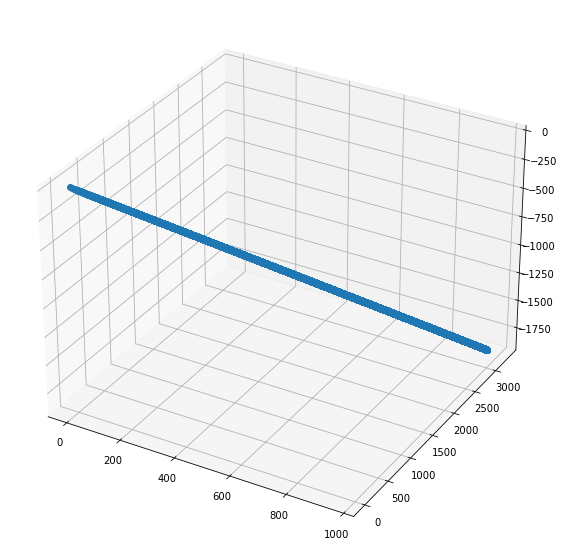

In [8]:
theta = np.array([0, 0, 0])
thetas_sgd_1 = np.array([theta])
learning_rate = 1
learning_rates = [learning_rate]

tmp_y = y.copy()
tmp_X_plus = X_plus.copy()

e = 0
print("threshold: " + str(threshold))

while True:
    sigma = np.random.permutation(300)
    tmp_X_plus = np.vstack((tmp_X_plus[0][sigma], tmp_X_plus[1][sigma], tmp_X_plus[2][sigma]))
    tmp_y = tmp_y[sigma]
    for i in range(300):
        pred = sigmoid(X_plus[:,i].T@theta)
        err = pred - tmp_y[i]
        g = tmp_X_plus[:,i]*err
        theta = theta - learning_rate*g
            
        learning_rate = 20 / (e*300 + i + 100)**.6
        learning_rates += [learning_rate]
    
    e += 1
    thetas_sgd_1 = np.vstack((thetas_sgd_1, theta))
    if np.array_equal(thetas_sgd_1[len(thetas_sgd_1) - 2], theta):
        break
    if e > threshold:
        print("threshold exceeded !")
        break

print("thetas :")
print(thetas_sgd_1.shape)
if e > threshold:
    print(thetas_sgd_1[-20:])
else:
    print(thetas_sgd_1)
    
print("learning_rates :")
print(learning_rates[-50:])
    
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas_sgd_1[:,0], thetas_sgd_1[:,1], thetas_sgd_1[:,2], '-o')

# 5. Comparaison

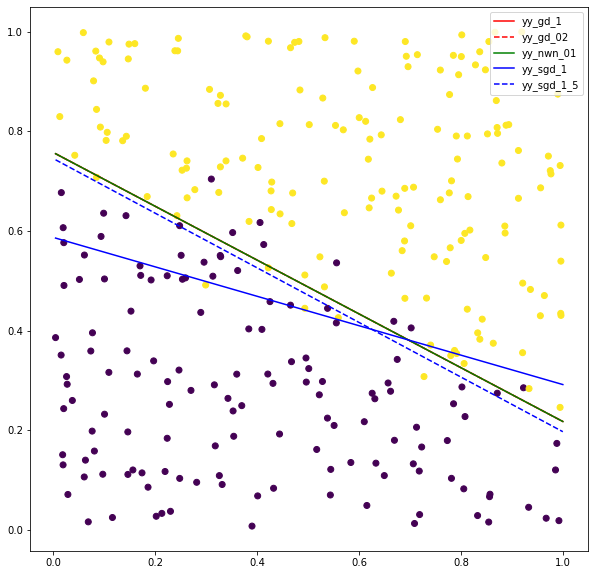

In [9]:
# https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

w1_gd_1, w2_gd_1, b_gd_1 = thetas_gd_1[-1].T 
w1_gd_02, w2_gd_02, b_gd_02 = thetas_gd_02[-1].T
w1_nwn_01, w2_nwn_01, b_nwn_01 = thetas_nwn_01[-1].T 
w1_sgd_1, w2_sgd_1, b_sgd_1 = thetas_sgd_1[-1].T 
w1_sgd_1_5, w2_sgd_1_5, b_sgd_1_5 = thetas_sgd_1_5[-1].T 

# intercept and gradient
c_gd_1, m_gd_1 = -b_gd_1/w2_gd_1, -w1_gd_1/w2_gd_1
c_gd_02, m_gd_02 = -b_gd_02/w2_gd_02, -w1_gd_02/w2_gd_02
c_nwn_01, m_nwn_01 = -b_nwn_01/w2_nwn_01, -w1_nwn_01/w2_nwn_01
c_sgd_1, m_sgd_1 = -b_sgd_1/w2_sgd_1, -w1_sgd_1/w2_sgd_1
c_sgd_1_5, m_sgd_1_5 = -b_sgd_1_5/w2_sgd_1_5, -w1_sgd_1_5/w2_sgd_1_5


# Plot the data and the classification with the decision boundary.
min1, max1 = X[0].min(), X[0].max()
min2, max2 = X[1].min(), X[1].max()

xx = np.array([min1, max2])

yy_gd_1 = m_gd_1*xx + c_gd_1
yy_gd_02 = m_gd_02*xx + c_gd_02
yy_nwn_01 = m_nwn_01*xx + c_nwn_01
yy_sgd_1 = m_sgd_1*xx + c_sgd_1
yy_sgd_1_5 = m_sgd_1_5*xx + c_sgd_1_5

fig = plt.figure(figsize=(10,10))
plt.scatter(X[0], X[1], c=y, marker="o")
plt.plot(xx, yy_gd_1, c='r', label="yy_gd_1")
plt.plot(xx, yy_gd_02, c='r', ls='--', label="yy_gd_02")
plt.plot(xx, yy_nwn_01, c='g', label="yy_nwn_01")
plt.plot(xx, yy_sgd_1, c='b', label="yy_sgd_1")
plt.plot(xx, yy_sgd_1_5, c='b', ls='--', label="yy_sgd_1_5")
plt.legend()

- On remarque clairement que la méthode Newton converge plus vite que le BGD.
- ~~Par contre pour la SGD on ne converge pas toujours ....~~

# 6. Proba

On a 

$$p(Y=1|x) = \frac {2}{3}$$
$$sigm(w.T*x + b) = \frac {2}{3}$$
On pose 
$$z = W^{T}*x + b$$
$$\frac {1}{1+exp^{-z}} = \frac {2}{3}$$
On a donc
$$3 = 2 + 2*exp^{-z}$$
$$1 = 2*exp^{-z}$$
$$ \frac {1}{2} =  exp^{-z}$$
$$ - \log {2} =  -z$$
$$ W^{T}*x + b - \log {2} =  0$$

# Decision Boundaries

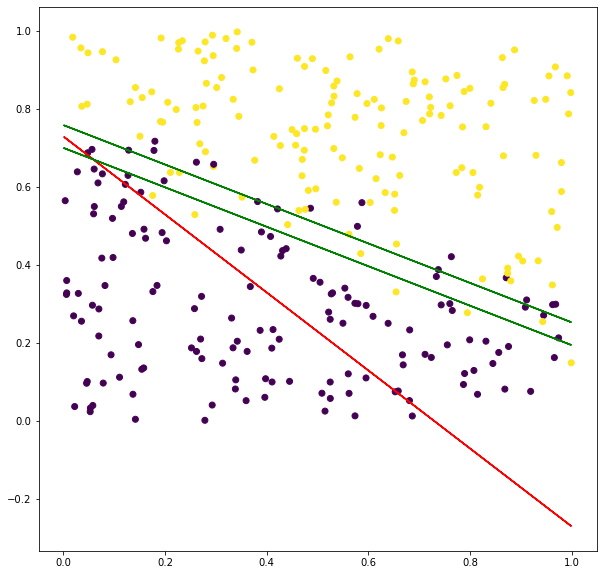

In [10]:
min1, max1 = X[0].min(), X[0].max()
min2, max2 = X[1].min(), X[1].max()
x_values1 = np.array([min1, max1, min2, max2])

y_values1 = - (thetas_gd_1[-1][1]*x_values1.T + thetas_gd_1[-1][2]) / thetas_gd_1[-1][1]
y_values2 = - (thetas_gd_1[-1][0]*x_values1.T + thetas_gd_1[-1][2] - np.log(2)) / thetas_gd_1[-1][1]
y_values3 = - (thetas_gd_1[-1][0]*x_values1.T + thetas_gd_1[-1][2] + np.log(2)) / thetas_gd_1[-1][1]

fig = plt.figure(figsize=(10,10))
plt.scatter(X[0], X[1], c=y, marker="o")
plt.plot(x_values1, y_values1, "-r")
plt.plot(x_values1, y_values2, "-g")
plt.plot(x_values1, y_values3, "-g")

plt.show()

(10, 10)


<a list of 6 text.Text objects>

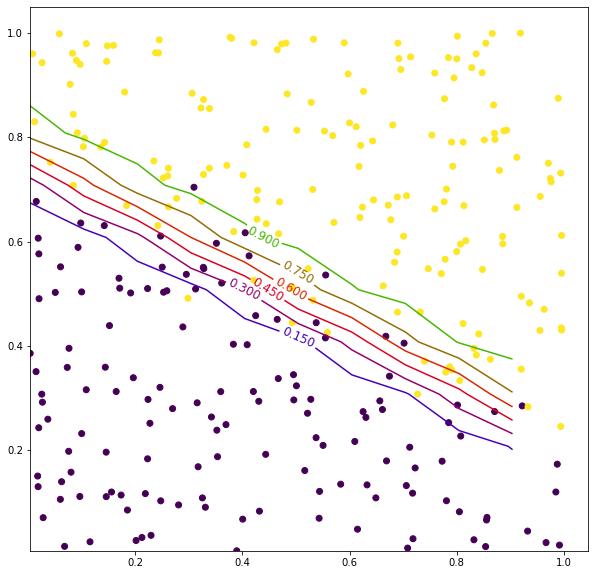

In [15]:
# https://thecleverprogrammer.com/2020/07/29/decision-boundary-in-machine-learning/

min1, max1 = X[0].min(), X[0].max()
min2, max2 = X[1].min(), X[1].max()

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all points
xx, yy = np.meshgrid(x1grid, x2grid)

print(xx.shape)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()

# horizontal stack vectors to create x1,x2 input for the model
grid = np.vstack((r1,r2,np.ones(len(r1))))

pred = sigmoid(grid.T@thetas_gd_1[-1])

zz = pred.reshape(xx.shape)

fig = plt.figure(figsize=(10,10))
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)
plt.scatter(X[0], X[1], c=y, marker="o")
plt.clabel(contour, inline=1, fontsize=12)

<a list of 6 text.Text objects>

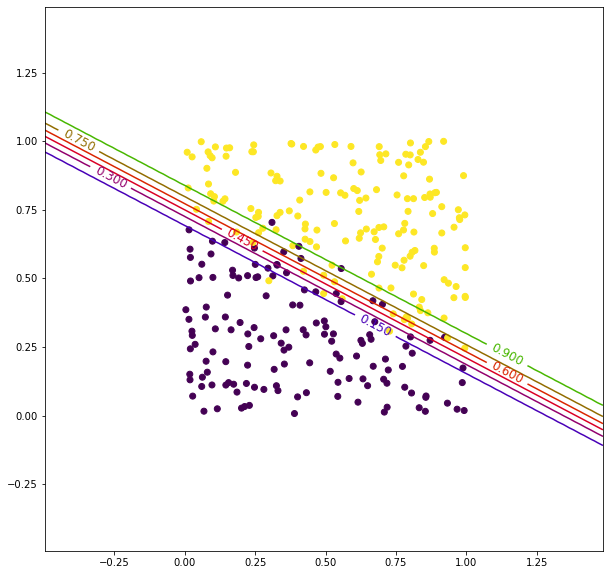

In [16]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_ = np.vstack((xx.flatten(), yy.flatten(), np.ones(xx.flatten().shape)))

pred = sigmoid(X_.T@thetas_gd_1[-1])
pred = pred.reshape(xx.shape)

fig = plt.figure(figsize=(10,10))
contour = plt.contour(xx, yy, pred, cmap=plt.cm.brg)
plt.scatter(X[0], X[1], c=y, marker="o")
plt.clabel(contour, inline=1, fontsize=12)

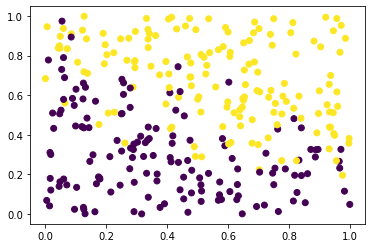

(3390, 3)
[[ 0.          0.          0.        ]
 [ 0.0223964   0.04803383 -0.03403558]
 [ 0.04457255  0.0955932  -0.06773544]
 ...
 [ 5.84136964 10.88611316 -8.1461773 ]
 [ 5.84136964 10.88611316 -8.1461773 ]
 [ 5.84136964 10.88611316 -8.1461773 ]]


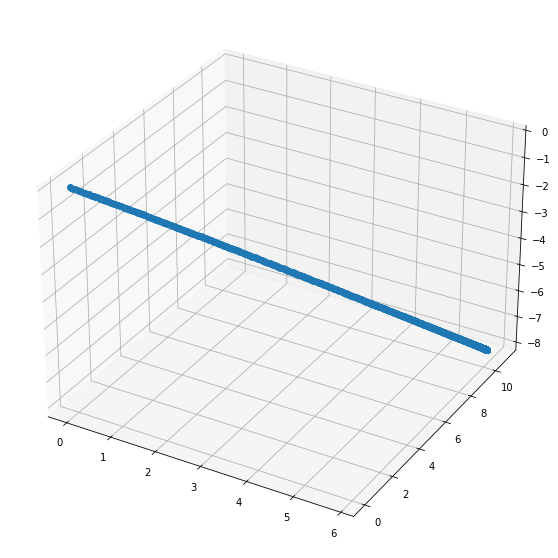

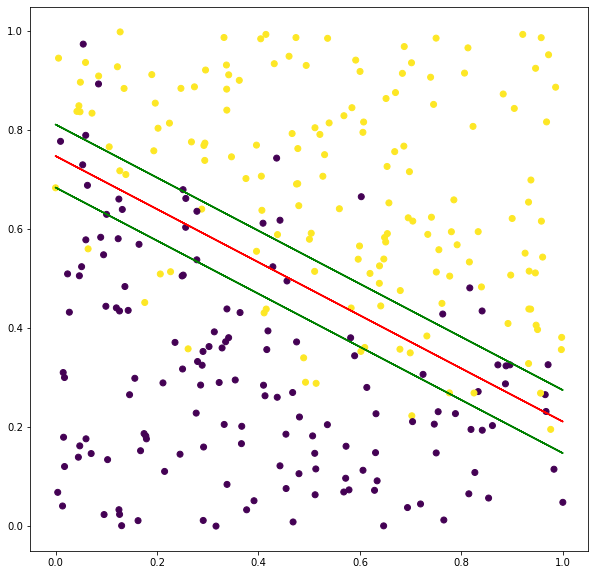

<a list of 6 text.Text objects>

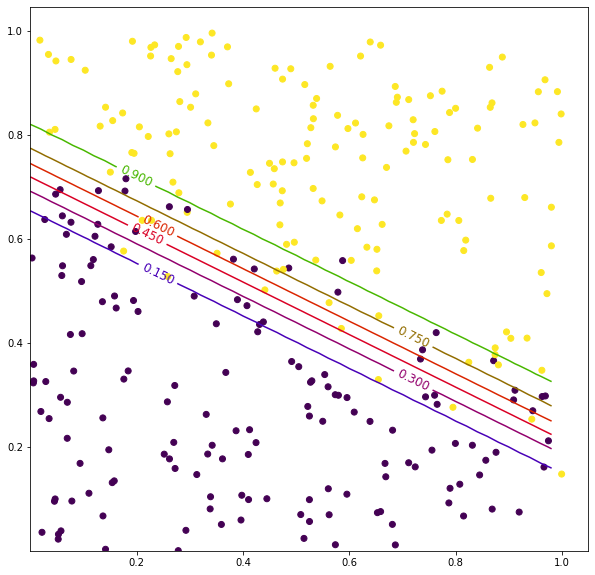

In [11]:
X2, y2 = datagen(300, .1)
X2_plus = np.vstack((X2, np.ones((1,300))))

plt.scatter(X2[0], X2[1], c=y2, marker="o")
plt.show()

theta = np.array([0, 0, 0])
thetas = np.array([theta])
learning_rate = 0.01

while True:
    pred = sigmoid(X2_plus.T@theta)
    err = pred - y2
    s = np.multiply(pred, (1-pred))
    S = np.diag(s.flatten())

    H = X2_plus@S@X2_plus.T
    g = X2_plus@err
    theta = theta - learning_rate*np.linalg.inv(H)@g
    thetas = np.vstack((thetas, theta))
    if np.array_equal(thetas[len(thetas) - 2], theta):
        break
    
print(thetas.shape)
print(thetas)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')
plt.show()

min1, max1 = X2[0].min(), X2[0].max()
min2, max2 = X2[1].min(), X2[1].max()
x_values1 = np.array([min1, max1, min2, max2])

y_values1 = - (theta[0]*x_values1.T + theta[2]) / theta[1]
y_values2 = - (theta[0]*x_values1.T + theta[2] - np.log(2)) / theta[1]
y_values3 = - (theta[0]*x_values1.T + theta[2] + np.log(2)) / theta[1]


fig = plt.figure(figsize=(10,10))
plt.scatter(X2[0], X2[1], c=y2)
plt.plot(x_values1, y_values1, "-r")
plt.plot(x_values1, y_values2, "-g")
plt.plot(x_values1, y_values3, "-g")
plt.show()

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(min1, max1, h), np.arange(min2, max2, h))

X_ = np.vstack((xx.flatten(), yy.flatten(), np.ones(xx.flatten().shape)))

pred = sigmoid(X_.T@thetas_gd_1[-1])
pred = pred.reshape(xx.shape)

fig = plt.figure(figsize=(10,10))
contour = plt.contour(xx, yy, pred, cmap=plt.cm.brg)
plt.scatter(X[0], X[1], c=y, marker="o")
plt.clabel(contour, inline=1, fontsize=12)